EXPLORATION - DÉTECTION ANOMALIES FINANCIÈRES
Dataset: Taiwanese Bankruptcy Prediction

1. CHARGEMENT DES DONNÉES
--------------------------------------------------------------------------------
✅ Dataset chargé avec succès!

Dimensions: 6,819 observations × 96 variables
Taille en mémoire: 4.99 MB

📊 APERÇU DES DONNÉES:
   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4  

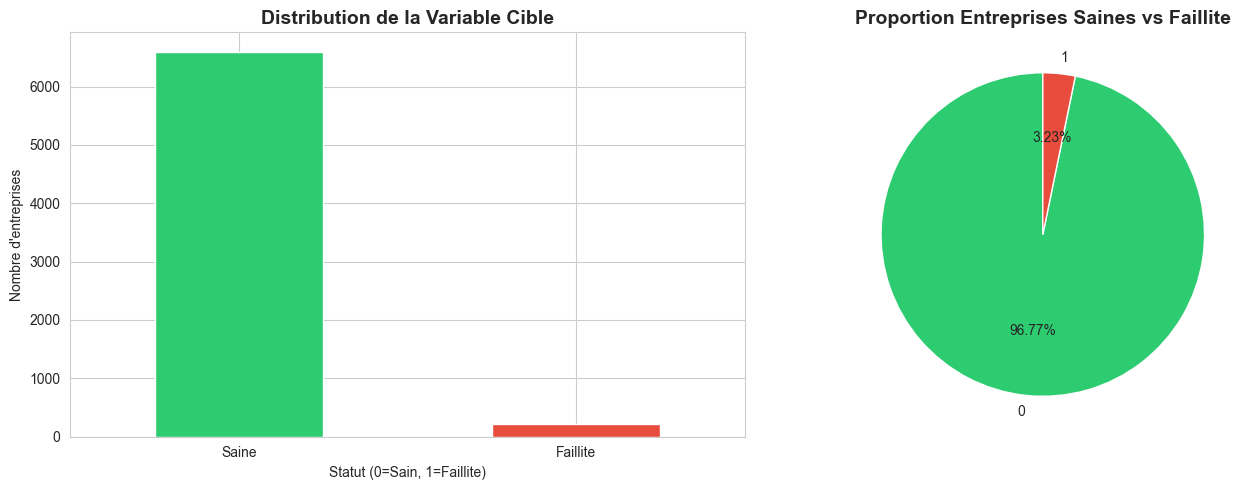


3. STATISTIQUES DESCRIPTIVES
--------------------------------------------------------------------------------

📈 Statistiques des variables numériques:
         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                      

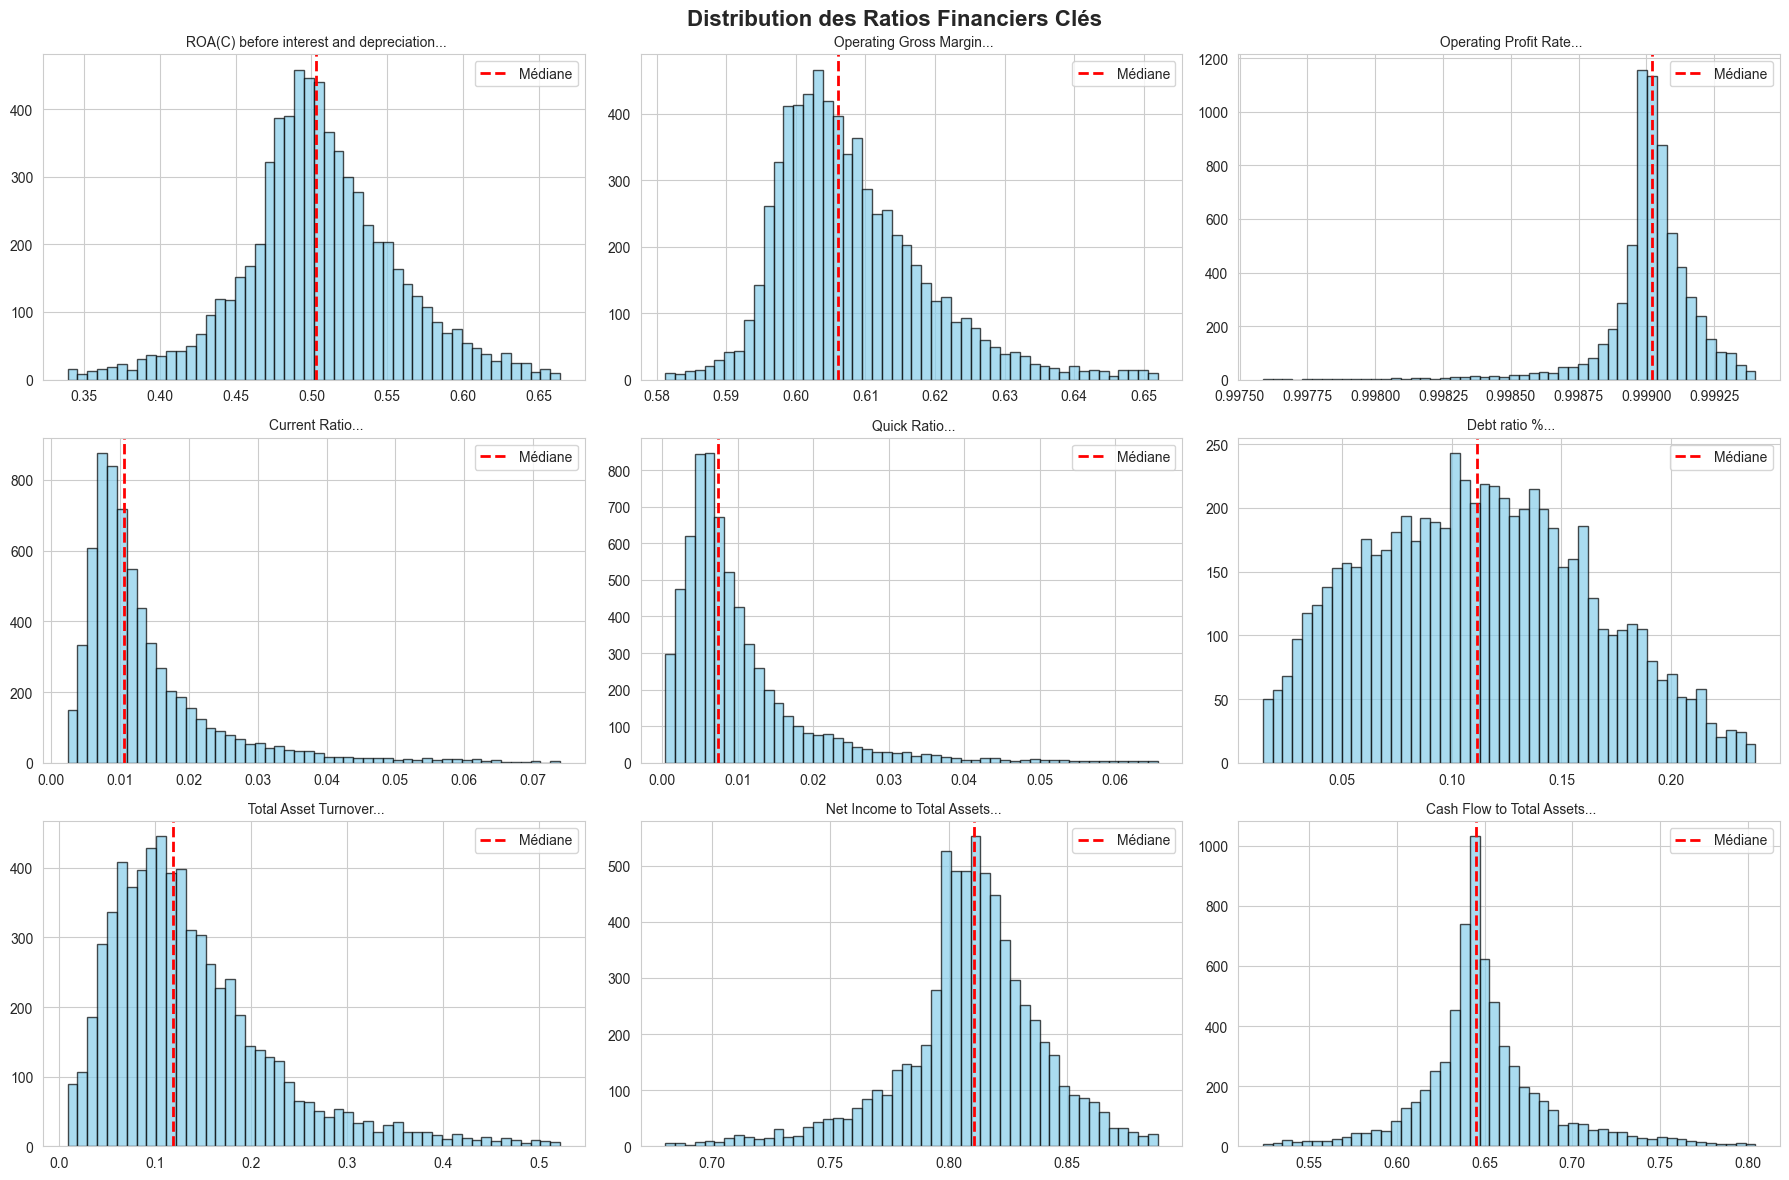


7. COMPARAISON ENTREPRISES SAINES vs FAILLITE
--------------------------------------------------------------------------------


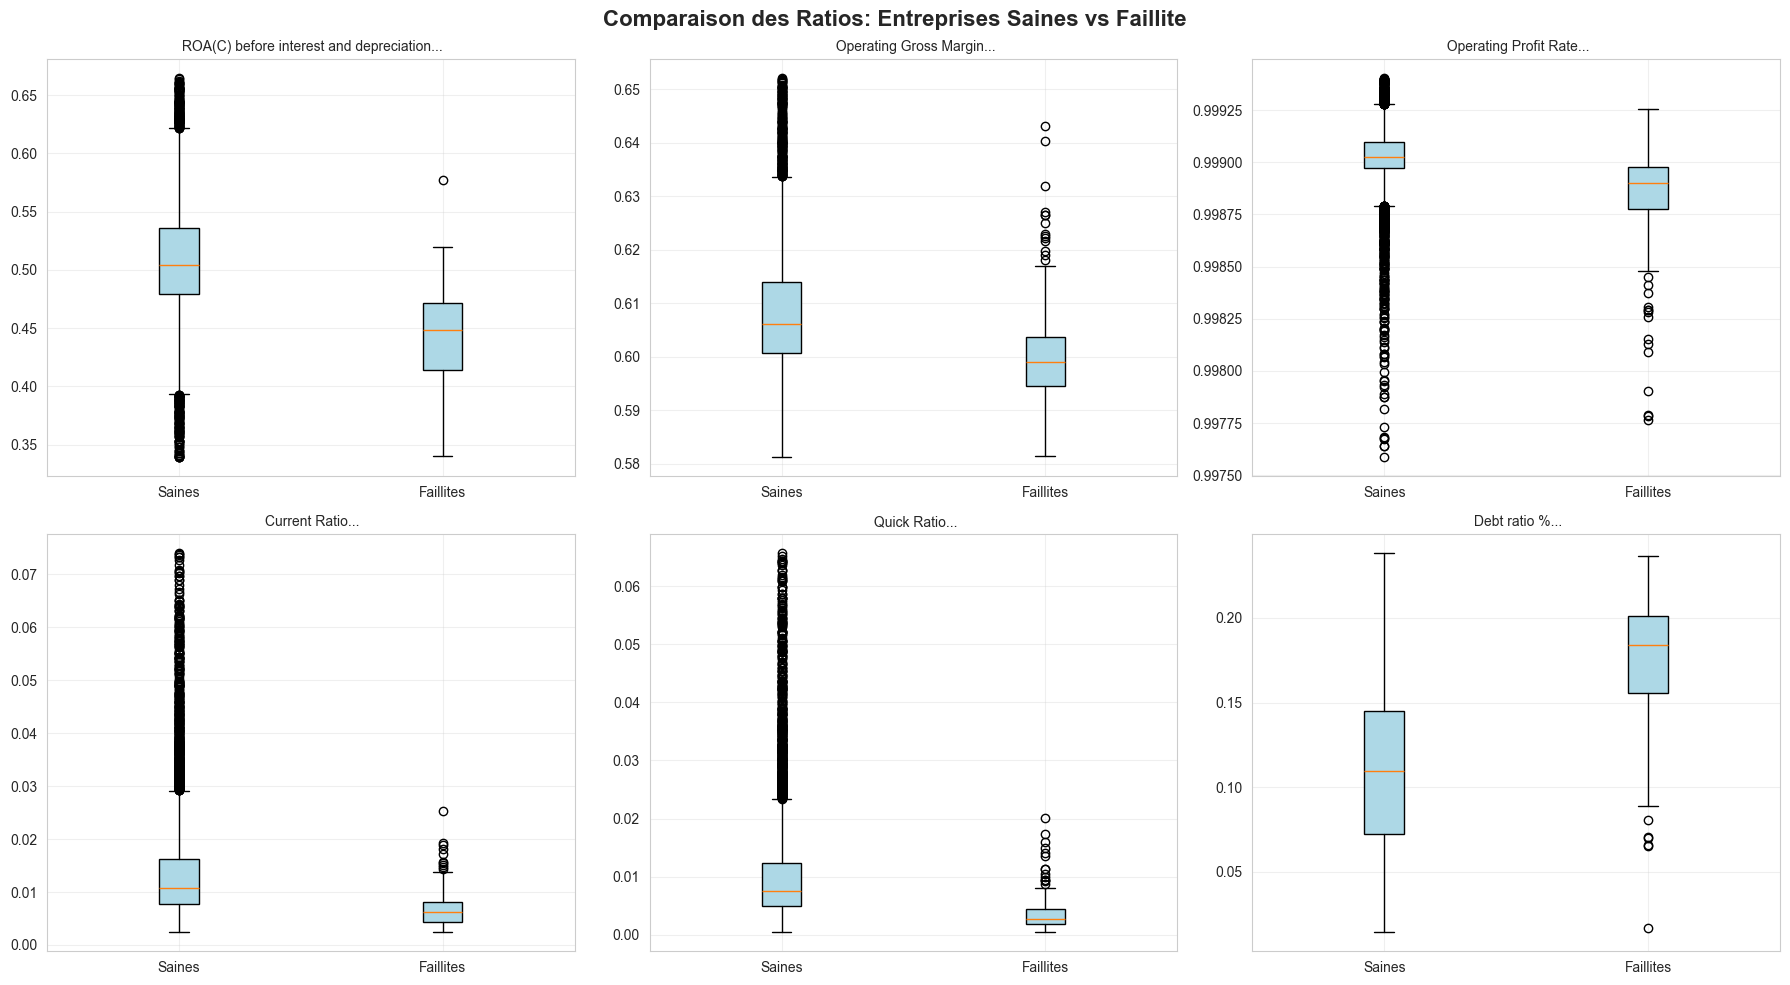


📊 Moyennes par groupe:
           ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                            
0                                                   0.508069         
1                                                   0.418503         

           Operating Gross Margin  Operating Profit Rate  Current Ratio  \
Bankrupt?                                                                 
0                        0.608257               0.998756  416729.822913   
1                        0.598670               0.998739       0.007238   

            Quick Ratio  Debt ratio %  
Bankrupt?                              
0          7.257160e+06      0.110714  
1          4.195455e+07      0.187047  

8. ANALYSE DES CORRÉLATIONS
--------------------------------------------------------------------------------


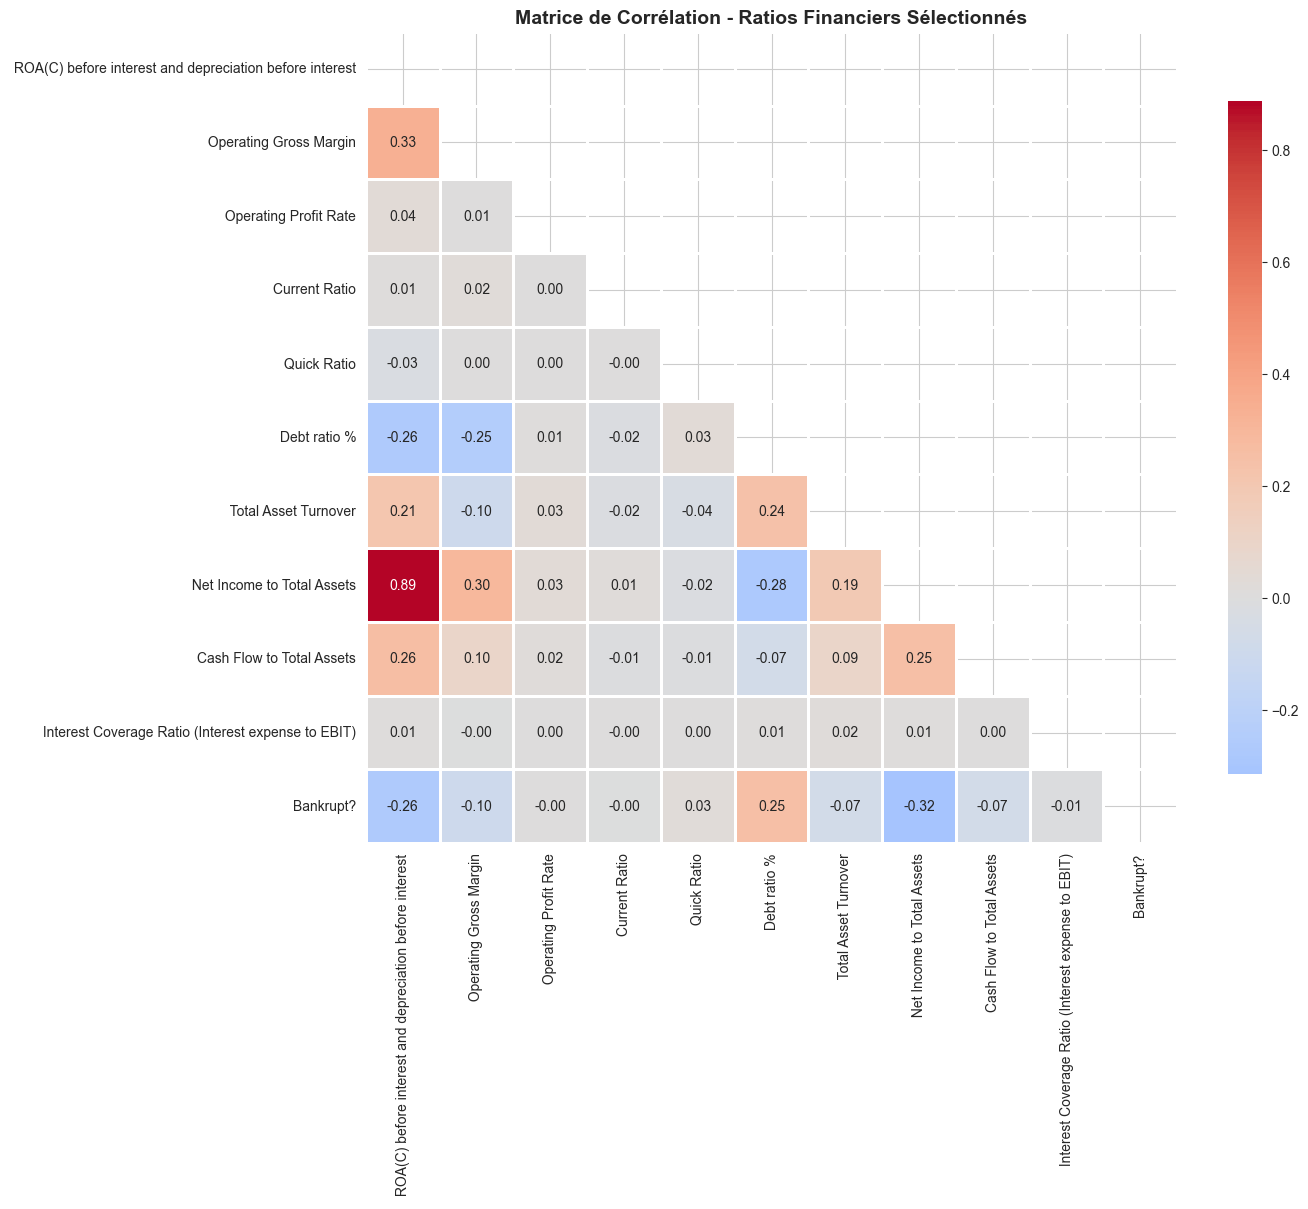


🎯 TOP 15 CORRÉLATIONS avec la variable cible (Bankrupt?):
Bankrupt?                                                   1.000000
 Net Income to Total Assets                                 0.315457
 ROA(A) before interest and % after tax                     0.282941
 ROA(B) before interest and depreciation after tax          0.273051
 ROA(C) before interest and depreciation before interest    0.260807
 Net worth/Assets                                           0.250161
 Debt ratio %                                               0.250161
 Persistent EPS in the Last Four Seasons                    0.219560
 Retained Earnings to Total Assets                          0.217779
 Net profit before tax/Paid-in capital                      0.207857
 Per Share Net profit before tax (Yuan ¥)                   0.201395
 Current Liability to Assets                                0.194494
 Working Capital to Total Assets                            0.193083
 Net Income to Stockholder's Equity         

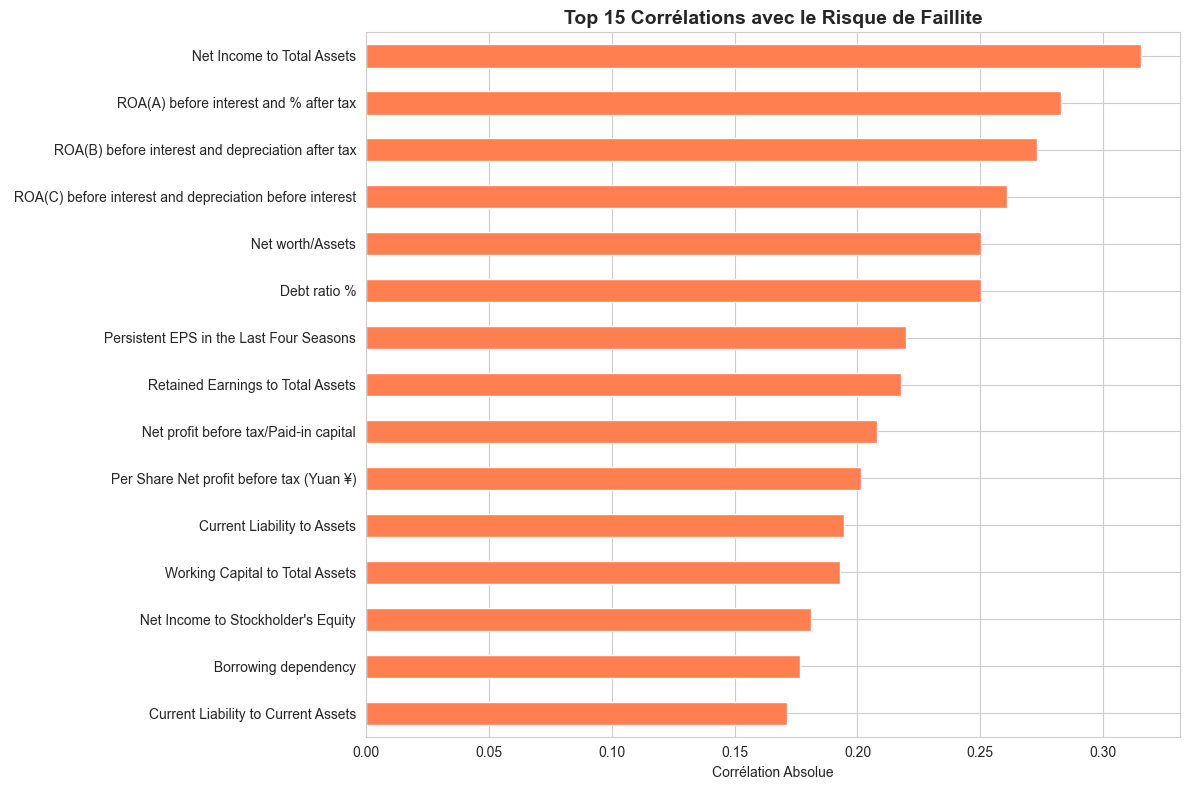


9. DÉTECTION DES OUTLIERS
--------------------------------------------------------------------------------

⚠️ Outliers détectés (Z-score > 3):
                                    Colonne  Outliers
48          Fixed Assets Turnover Frequency       251
56                        Cash/Total Assets       167
13      Interest-bearing debt interest rate       146
44                     Total Asset Turnover       135
79                Cash Flow to Total Assets       134
80                   Cash Flow to Liability       122
60             Operating Funds to Liability       116
16                  Net Value Per Share (A)       115
17                  Net Value Per Share (C)       115
15                  Net Value Per Share (B)       115
14                             Tax rate (A)       114
1    ROA(A) before interest and % after tax       110
70              Current Asset Turnover Rate       108
94                      Equity to Liability       106
69                     Total expense/Assets  

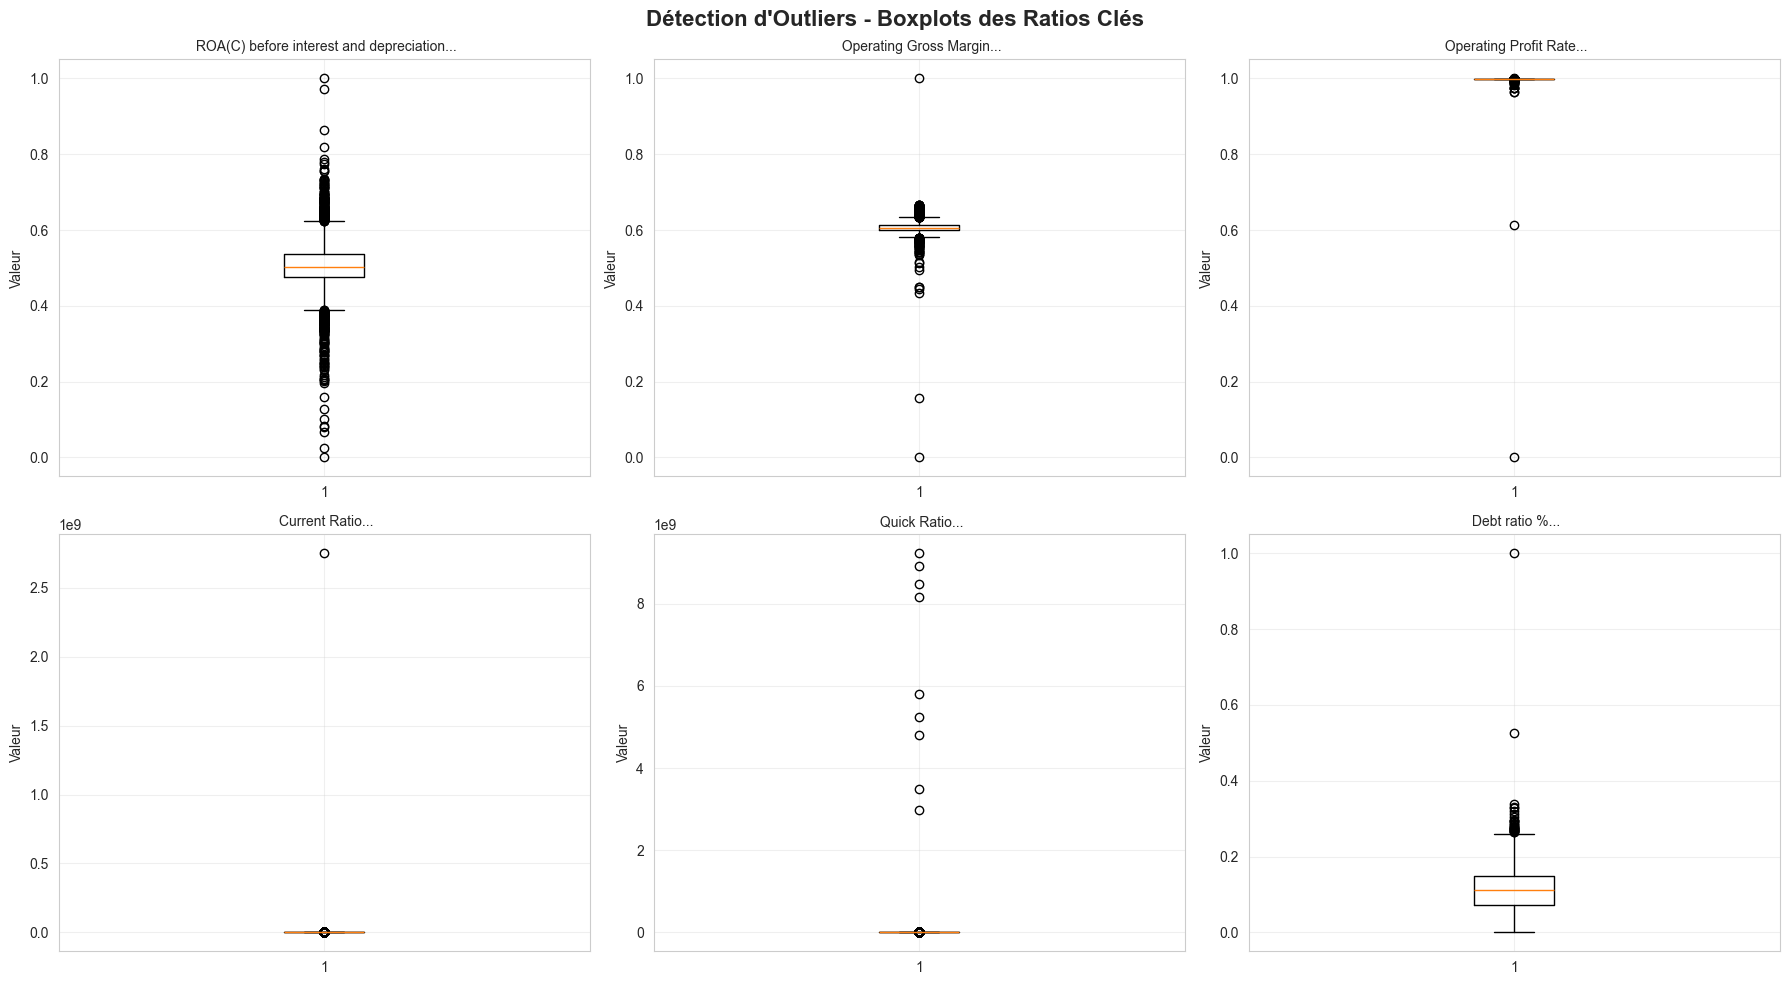


10. VISUALISATION INTERACTIVE 3D
--------------------------------------------------------------------------------


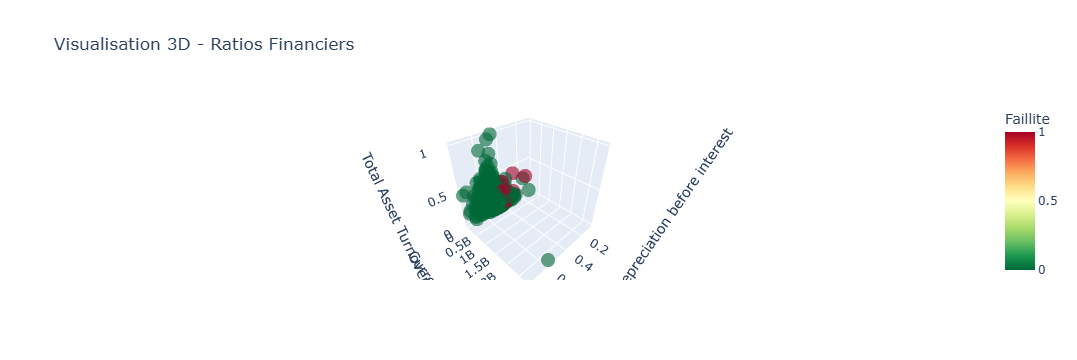

✅ Graphique 3D interactif sauvegardé: ../data/cleaned/3d_visualization.html

RÉSUMÉ DE L'EXPLORATION

📊 DATASET: Taiwanese Bankruptcy Prediction
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

DIMENSIONS:
-----------
• Observations: 6,819
• Variables: 96
• Taille: 4.99 MB

VARIABLE CIBLE (Bankrupt?):
--------------------------
• Entreprises saines (0): 6,599 (96.77%)
• Entreprises en faillite (1): 220 (3.23%)
• Ratio de déséquilibre: 30.00:1
• ⚠️ Dataset TRÈS DÉSÉQUILIBRÉ

QUALITÉ DES DONNÉES:
-------------------
• Valeurs manquantes: 0 (0.00%)
• Duplicatas: 0 (0.00%)
• Outliers détectés: 4,534

TOP 5 RATIOS CORRÉLÉS À LA FAILLITE:
------------------------------------
  1.  Net Income to Total Assets
  2.  ROA(A) before interest and % after tax
  3.  ROA(B) before interest and depreciation after tax
  4.  ROA(C) before interest and depreciation before interest
  5.  Net worth/Assets

ACTIONS RECOMMANDÉES:
--------------------
✓ Traiter le déséquilibre (SMOTE, undersampling)


✓ Traiter

In [2]:
# ================================================================================
# NOTEBOOK 1: EXPLORATION DES DONNÉES
# Dataset: Taiwanese Bankruptcy Prediction
# Fichier: notebooks/01_exploration.ipynb
# ================================================================================

"""
PROJET: Détection d'Anomalies Financières - Prédiction de Faillite
Dataset: 6,819 entreprises taiwanaises avec 95 ratios financiers
Variable cible: Bankrupt? (0=Sain, 1=Faillite)
"""

# ================================================================================
# IMPORTS
# ================================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("=" * 80)
print("EXPLORATION - DÉTECTION ANOMALIES FINANCIÈRES")
print("Dataset: Taiwanese Bankruptcy Prediction")
print("=" * 80)

# ================================================================================
# 1. CHARGEMENT DES DONNÉES
# ================================================================================

print("\n1. CHARGEMENT DES DONNÉES")
print("-" * 80)

# Charger le dataset principal
# ADAPTEZ LE NOM selon votre fichier exact
df = pd.read_csv('../data/raw/taiwainese Branckucy prediction.csv') 

print(f"✅ Dataset chargé avec succès!")
print(f"\nDimensions: {df.shape[0]:,} observations × {df.shape[1]} variables")
print(f"Taille en mémoire: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Aperçu des données
print("\n📊 APERÇU DES DONNÉES:")
print(df.head())

# Informations sur les colonnes
print("\n📋 INFORMATIONS SUR LES COLONNES:")
print(df.info())

# ================================================================================
# 2. ANALYSE DE LA VARIABLE CIBLE
# ================================================================================

print("\n2. ANALYSE DE LA VARIABLE CIBLE: 'Bankrupt?'")
print("-" * 80)

target_col = 'Bankrupt?'

# Distribution
print("\nDistribution de la variable cible:")
print(df[target_col].value_counts())
print("\nProportions:")
print(df[target_col].value_counts(normalize=True).round(4))

# Déséquilibre des classes
bankrupt_count = df[target_col].sum()
healthy_count = len(df) - bankrupt_count
imbalance_ratio = healthy_count / bankrupt_count

print(f"\n📊 Statistiques:")
print(f"   Entreprises saines (0): {healthy_count:,} ({healthy_count/len(df)*100:.2f}%)")
print(f"   Entreprises en faillite (1): {bankrupt_count:,} ({bankrupt_count/len(df)*100:.2f}%)")
print(f"   Ratio de déséquilibre: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print(f"\n⚠️ DATASET FORTEMENT DÉSÉQUILIBRÉ!")
    print(f"   → Techniques de rééquilibrage nécessaires (SMOTE, undersampling)")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barplot
df[target_col].value_counts().plot(kind='bar', ax=axes[0], 
                                    color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribution de la Variable Cible', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Statut (0=Sain, 1=Faillite)')
axes[0].set_ylabel('Nombre d\'entreprises')
axes[0].set_xticklabels(['Saine', 'Faillite'], rotation=0)

# Pie chart
colors = ['#2ecc71', '#e74c3c']
df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.2f%%',
                                    colors=colors, startangle=90)
axes[1].set_title('Proportion Entreprises Saines vs Faillite', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('../data/cleaned/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================================
# 3. STATISTIQUES DESCRIPTIVES
# ================================================================================

print("\n3. STATISTIQUES DESCRIPTIVES")
print("-" * 80)

# Statistiques de base
print("\n📈 Statistiques des variables numériques:")
stats = df.describe()
print(stats)

# Sauvegarder les statistiques
stats.to_csv('../data/cleaned/descriptive_statistics.csv')
print("\n✅ Statistiques sauvegardées: ../data/cleaned/descriptive_statistics.csv")

# ================================================================================
# 4. VALEURS MANQUANTES
# ================================================================================

print("\n4. ANALYSE DES VALEURS MANQUANTES")
print("-" * 80)

# Compter les valeurs manquantes
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Manquantes': missing.values,
    'Pourcentage': missing_pct.values
})
missing_df = missing_df[missing_df['Manquantes'] > 0].sort_values('Pourcentage', ascending=False)

if len(missing_df) > 0:
    print(f"\n⚠️ Valeurs manquantes détectées:")
    print(f"   Total: {missing.sum():,} ({(missing.sum()/(df.shape[0]*df.shape[1])*100):.2f}%)")
    print(f"\n   Colonnes concernées:")
    print(missing_df.head(20))
    
    # Visualisation
    if len(missing_df) <= 30:
        plt.figure(figsize=(12, 6))
        plt.barh(missing_df['Colonne'], missing_df['Pourcentage'], color='coral')
        plt.xlabel('Pourcentage de valeurs manquantes (%)')
        plt.title('Valeurs Manquantes par Colonne', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig('../data/cleaned/missing_values.png', dpi=300, bbox_inches='tight')
        plt.show()
else:
    print("   ✅ Aucune valeur manquante détectée!")

# ================================================================================
# 5. DUPLICATAS
# ================================================================================

print("\n5. DÉTECTION DES DUPLICATAS")
print("-" * 80)

duplicates = df.duplicated().sum()
print(f"   Lignes dupliquées: {duplicates:,} ({(duplicates/len(df)*100):.2f}%)")

if duplicates > 0:
    print(f"   ⚠️ {duplicates} lignes dupliquées à supprimer lors du nettoyage")

# ================================================================================
# 6. ANALYSE DES RATIOS FINANCIERS CLÉS
# ================================================================================

print("\n6. ANALYSE DES RATIOS FINANCIERS CLÉS")
print("-" * 80)

# Sélectionner quelques ratios importants pour l'analyse
key_ratios = [
    ' ROA(C) before interest and depreciation before interest',
    ' Operating Gross Margin',
    ' Operating Profit Rate',
    ' Current Ratio',
    ' Quick Ratio',
    ' Debt ratio %',
    ' Total Asset Turnover',
    ' Net Income to Total Assets',
    ' Cash Flow to Total Assets',
    ' Interest Coverage Ratio (Interest expense to EBIT)',
]

# Vérifier quels ratios sont présents
available_ratios = [col for col in key_ratios if col in df.columns]
print(f"\nRatios clés analysés: {len(available_ratios)}")

# Distribution des ratios
if len(available_ratios) > 0:
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    for idx, ratio in enumerate(available_ratios[:9]):
        # Supprimer les outliers extrêmes pour meilleure visualisation
        data = df[ratio].dropna()
        q1 = data.quantile(0.01)
        q99 = data.quantile(0.99)
        filtered_data = data[(data >= q1) & (data <= q99)]
        
        axes[idx].hist(filtered_data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(ratio[:40] + '...', fontsize=10)
        axes[idx].axvline(data.median(), color='red', linestyle='--', 
                         linewidth=2, label='Médiane')
        axes[idx].legend()
    
    plt.suptitle('Distribution des Ratios Financiers Clés', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('../data/cleaned/ratios_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# ================================================================================
# 7. COMPARAISON: ENTREPRISES SAINES vs FAILLITE
# ================================================================================

print("\n7. COMPARAISON ENTREPRISES SAINES vs FAILLITE")
print("-" * 80)

# Boxplots comparatifs
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, ratio in enumerate(available_ratios[:6]):
    # Données par groupe
    saines = df[df[target_col] == 0][ratio].dropna()
    faillites = df[df[target_col] == 1][ratio].dropna()
    
    # Filtrer outliers pour meilleure visualisation
    q1, q99 = df[ratio].quantile([0.01, 0.99])
    
    axes[idx].boxplot([saines[(saines >= q1) & (saines <= q99)], 
                       faillites[(faillites >= q1) & (faillites <= q99)]],
                      labels=['Saines', 'Faillites'],
                      patch_artist=True,
                      boxprops=dict(facecolor='lightblue'))
    axes[idx].set_title(ratio[:40] + '...', fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Comparaison des Ratios: Entreprises Saines vs Faillite', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../data/cleaned/ratios_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistiques par groupe
print("\n📊 Moyennes par groupe:")
comparison_stats = df.groupby(target_col)[available_ratios[:6]].mean()
print(comparison_stats)

# ================================================================================
# 8. MATRICE DE CORRÉLATION
# ================================================================================

print("\n8. ANALYSE DES CORRÉLATIONS")
print("-" * 80)

# Sélectionner un sous-ensemble de features pour la matrice de corrélation
# (toutes les 95 features rendraient la visualisation illisible)
selected_features = available_ratios[:15] if len(available_ratios) >= 15 else available_ratios
selected_features.append(target_col)

correlation_matrix = df[selected_features].corr()

# Visualisation
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation - Ratios Financiers Sélectionnés', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../data/cleaned/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Corrélations avec la variable cible
print("\n🎯 TOP 15 CORRÉLATIONS avec la variable cible (Bankrupt?):")
target_corr = df.corr()[target_col].abs().sort_values(ascending=False)
print(target_corr.head(16))  # 16 car inclut la cible elle-même

# Visualisation
plt.figure(figsize=(12, 8))
target_corr.drop(target_col).head(15).sort_values().plot(kind='barh', color='coral')
plt.title('Top 15 Corrélations avec le Risque de Faillite', 
          fontsize=14, fontweight='bold')
plt.xlabel('Corrélation Absolue')
plt.tight_layout()
plt.savefig('../data/cleaned/target_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================================
# 9. DÉTECTION D'OUTLIERS
# ================================================================================

print("\n9. DÉTECTION DES OUTLIERS")
print("-" * 80)

from scipy import stats

# Calculer les Z-scores pour les ratios clés
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove(target_col)  # Exclure la variable cible

# Compter les outliers par colonne (Z-score > 3)
outlier_counts = {}
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outlier_counts[col] = (z_scores > 3).sum()

# Top colonnes avec outliers
outliers_df = pd.DataFrame(list(outlier_counts.items()), 
                           columns=['Colonne', 'Outliers'])
outliers_df = outliers_df[outliers_df['Outliers'] > 0].sort_values('Outliers', ascending=False)

print(f"\n⚠️ Outliers détectés (Z-score > 3):")
print(outliers_df.head(15))

# Visualisation boxplot pour quelques ratios
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, ratio in enumerate(available_ratios[:6]):
    axes[idx].boxplot(df[ratio].dropna(), vert=True)
    axes[idx].set_title(ratio[:40] + '...', fontsize=10)
    axes[idx].set_ylabel('Valeur')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Détection d\'Outliers - Boxplots des Ratios Clés', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../data/cleaned/outliers_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================================
# 10. VISUALISATION INTERACTIVE 3D
# ================================================================================

print("\n10. VISUALISATION INTERACTIVE 3D")
print("-" * 80)

# Sélectionner 3 ratios importants pour la visualisation 3D
if len(available_ratios) >= 3:
    ratio1 = available_ratios[0]
    ratio2 = available_ratios[3] if len(available_ratios) > 3 else available_ratios[1]
    ratio3 = available_ratios[6] if len(available_ratios) > 6 else available_ratios[2]
    
    # Créer un échantillon pour performance
    df_sample = df.sample(min(2000, len(df)), random_state=42)
    
    fig = px.scatter_3d(df_sample, 
                        x=ratio1, 
                        y=ratio2, 
                        z=ratio3,
                        color=target_col,
                        title='Visualisation 3D - Ratios Financiers',
                        labels={target_col: 'Faillite'},
                        color_continuous_scale='RdYlGn_r',
                        opacity=0.6)
    
    fig.write_html('../data/cleaned/3d_visualization.html')
    fig.show()
    print("✅ Graphique 3D interactif sauvegardé: ../data/cleaned/3d_visualization.html")

# ================================================================================
# 11. RÉSUMÉ ET INSIGHTS
# ================================================================================

print("\n" + "=" * 80)
print("RÉSUMÉ DE L'EXPLORATION")
print("=" * 80)

insights = f"""
📊 DATASET: Taiwanese Bankruptcy Prediction
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

DIMENSIONS:
-----------
• Observations: {df.shape[0]:,}
• Variables: {df.shape[1]}
• Taille: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

VARIABLE CIBLE (Bankrupt?):
--------------------------
• Entreprises saines (0): {healthy_count:,} ({healthy_count/len(df)*100:.2f}%)
• Entreprises en faillite (1): {bankrupt_count:,} ({bankrupt_count/len(df)*100:.2f}%)
• Ratio de déséquilibre: {imbalance_ratio:.2f}:1
• ⚠️ Dataset {'TRÈS' if imbalance_ratio > 10 else ''} DÉSÉQUILIBRÉ

QUALITÉ DES DONNÉES:
-------------------
• Valeurs manquantes: {missing.sum():,} ({(missing.sum()/(df.shape[0]*df.shape[1])*100):.2f}%)
• Duplicatas: {duplicates:,} ({(duplicates/len(df)*100):.2f}%)
• Outliers détectés: {outliers_df['Outliers'].sum():,}

TOP 5 RATIOS CORRÉLÉS À LA FAILLITE:
------------------------------------
{chr(10).join(f"  {i+1}. {col[:60]}" for i, col in enumerate(target_corr.drop(target_col).head(5).index))}

ACTIONS RECOMMANDÉES:
--------------------
{'✓ Traiter le déséquilibre (SMOTE, undersampling)' if imbalance_ratio > 3 else ''}
{'✓ Imputer ou supprimer les valeurs manquantes' if missing.sum() > 0 else ''}
{'✓ Supprimer les duplicatas' if duplicates > 0 else ''}
✓ Traiter les outliers extrêmes
✓ Normaliser/Standardiser les ratios financiers
✓ Sélectionner les features les plus pertinentes
✓ Réduction de dimensionnalité (95 features → ~15-20)

FICHIERS GÉNÉRÉS:
----------------
✓ target_distribution.png
✓ descriptive_statistics.csv
✓ ratios_distribution.png
✓ ratios_comparison.png
✓ correlation_matrix.png
✓ target_correlations.png
✓ outliers_boxplots.png
✓ 3d_visualization.html

PROCHAINE ÉTAPE:
---------------
→ Notebook 02: Nettoyage des données (02_cleaning.ipynb)
"""

print(insights)

# Sauvegarder le résumé
with open('../data/cleaned/exploration_summary.txt', 'w', encoding='utf-8') as f:
    f.write(insights)

print("\n✅ Exploration terminée!")
print("📄 Rapport sauvegardé: ../data/cleaned/exploration_summary.txt")
print("=" * 80)